<a href="https://colab.research.google.com/github/LeandroCoelhos/tomografia_computadorizada/blob/main/Tomografia_computadorizada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tomografica Computadorizada - Modelagem e Matemática**
Prof. Associado Sergio Muniz Oliva Filho

## Projeto 4 - Tomografia Computadorizada (Junho de 2021)

*   Agenor Evaristo 
*   Leandro Coelho 
*   Mariana F. A. Arruda 
*   Rodrigo A. Nakahara 
*   Vitor E. Moreira 
---

In [1]:
''' Algoritmo de Técnica de Reconstrução Algébrica (TRA)
A ideia por traz deste trabalho é a reconstrução da imagem interna do corpo humano(ou animal) a partir de raios X.
Para a contrução da imagem precisamos dos valores da intensidade dos raios lançados pela máquina por um lado e captados do outro depois de passar pelo corpo, chamaremos cada raio de 'bi'.
Para cada raio lançado, precisamos determinar por onde o raio passa, e guardar essa informação em uma matriz 'ai', em que 'i' é referente a um determinado raio X lançado sobre o corpo.
Na construção da imagem, são utilizadas a matriz 'ai' e o valor dos raios 'bi' para gerar a imagem em uma matriz quadrada que representa os pixels da imagem.

No algorítimo 1 foi mantida a lógica da vida real no lançamento dos raios, o que gerou a limitação de definição da imagem.
No algoritimo 2 foram geradas aleatorimente as matrizes 'ai' e os raios 'bi', gerando bons resultados. Isso é um caso abstrato, mas mantem a complexidade computacional do modelo real e geram boas imagens,
sugerindo que a contrução de imagens pelo método abordado é possivel.

Na simulação dos resultados, foram usadas imagens reais em matriz de 0 e 1, em preto e branco. Definido pelo algoritomo usado, a matriz 'ai' gerada, é multiplicada pela matriz x de pixels,
gerando os valores dos raios 'bi'. Essa abordagem "sintética" possibilitou a geração de feixes de raios X 'bi' sem te-los efetivamente.

# M feixes = M equações
# x é vetor de pixels
# a é o vetor de proporções a_{ij} para cada pixel em relação a cada feixe
'''

' Algoritmo de Técnica de Reconstrução Algébrica (TRA)\nA ideia por traz deste trabalho é a reconstrução da imagem interna do corpo humano(ou animal) a partir de raios X.\nPara a contrução da imagem precisamos dos valores da intensidade dos raios lançados pela máquina por um lado e captados do outro depois de passar pelo corpo, chamaremos cada raio de \'bi\'.\nPara cada raio lançado, precisamos determinar por onde o raio passa, e guardar essa informação em uma matriz \'ai\', em que \'i\' é referente a um determinado raio X lançado sobre o corpo.\nNa construção da imagem, são utilizadas a matriz \'ai\' e o valor dos raios \'bi\' para gerar a imagem em uma matriz quadrada que representa os pixels da imagem.\n\nNo algorítimo 1 foi mantida a lógica da vida real no lançamento dos raios, o que gerou a limitação de definição da imagem.\nNo algoritimo 2 foram geradas aleatorimente as matrizes \'ai\' e os raios \'bi\', gerando bons resultados. Isso é um caso abstrato, mas mantem a complexidade 

In [2]:
import numpy as np
from PIL import Image
from matplotlib import image
from matplotlib import pyplot
import matplotlib.pyplot as plt
import requests

In [3]:
#Primeiro Exemplo do livro pg 637 do pdf
#cada conjunto de pontos representa [x1] , [x2]. O primeiro é estipulado e os outros valores serão descobertos nas P-iterações
x = np.array([ [[1] , [3]] , [[0] , [0]] , [[0] , [0]] , [[0] , [0]] ] , dtype='f')
#cada par [] [] representa se o raio passou pelo pixel [x1] [x2]
a = np.array([ [ [0] , [0] ] , [ [1] , [1] ] , [ [1] , [-2] ] , [ [3] , [-1] ] ], dtype='f')
#                               -----a1-----    -----a2------    ------a3-------
#valores de bi    b1, b2, b3
b = np.array([ 0, 2, -2, 3 ])

In [4]:
#repetição de fora para os P
for p in np.arange(1,7):
  #iteração interna para os X (x0, x1, x2, x3)
  for k in np.arange(1,4):
    x[k] = x[k-1] + ( (b[k] - (a[k].T.dot(x[k-1]))) / a[k].T.dot(a[k]) )*(a[k])   
    #print("Valores : ", x[k], "\n\n")
  x[0] = x[k] #atribui o ultimo valor encontrado para a proxima iteração x0

#Mostra o resultado depois de todas interações
x[1:]

array([[[1.09092   ],
        [0.90908   ]],

       [[0.83636796],
        [1.418184  ]],

       [[1.4090921 ],
        [1.227276  ]]], dtype=float32)

#Questão 4

In [5]:
#Matriz do tamanho da imagem Vazia (3x3). Representa cada pixel da imagem
                      # 1 2 3
                      # 4 5 6
                      # 7 8 9

zer = np.array([ [0], [0], [0], 
                 [0], [0], [0], 
                 [0], [0], [0]  ])
#Método centro pixel. Recebe 1 se passou pelo centro do pixel
a1 = np.array([ [0], [0], [0], 
                [0], [0], [0], 
                [1], [1], [1]  ])

a2 = np.array([[0], [0], [0],
               [1], [1], [1], 
               [0], [0], [0]  ])

a3 = np.array([[1], [1], [1],
               [0], [0], [0], 
               [0], [0], [0]  ])

a4 = np.array([[0], [0], [0],
               [0], [0], [1], 
               [0], [1], [1]  ])

a5 = np.array([[0], [0], [1],
               [0], [1], [0], 
               [1], [0], [0]  ])

a6 = np.array([[1], [1], [0],
               [1], [0], [0], 
               [0], [0], [0]  ])

a7 = np.array([[0], [0], [1],
               [0], [0], [1], 
               [0], [0], [1]  ])

a8 = np.array([[0], [1], [0],
               [0], [1], [0], 
               [0], [1], [0]  ])

a9 = np.array([[1], [0], [0],
               [1], [0], [0], 
               [1], [0], [0]  ])

a10 =np.array([[0], [1], [1],
               [0], [0], [1], 
               [0], [0], [0]  ])

a11 =np.array([[1], [0], [0],
               [0], [1], [0], 
               [0], [0], [1]  ])

a12 =np.array([[0], [0], [0],
               [1], [0], [0], 
               [1], [1], [0]  ])

In [6]:
#Cria a matriz de pixel X para ser iterada e o X0, ou seja, 12 matrizes de pixel mais a matriz X0
x = np.array([ zer, zer, zer, zer, zer, zer, zer, zer, zer, zer, zer, zer, zer ] , dtype='f')

#primeiro valor é zero, pois não é usado
a = np.array([ zer, a1, a2, a3, a4, a5, a6, a7, a8, a9, a10, a11, a12 ], dtype='f')

#primeiro valor é zero, pois não é usado
b = np.array([ 0, 13, 15, 8, 14.79, 14.31, 3.81, 18, 12, 6, 10.51, 16.13, 7.04 ])

In [7]:
#repetição de fora para os P
for p in np.arange(1,46):
#iteração interna para os X (x0, x1, x2,..., Xm)
  for k in np.arange(1,13):
    x[k] = x[k-1] + ( (b[k] - (a[k].T.dot(x[k-1]))) / a[k].T.dot(a[k]) )*(a[k])   
    #print("Valores : ", x[k], "\n\n")
  x[0] = x[k] #atribui o ultimo valor encontrado para a proxima iteração x0

#Mostra o resultado depois de todas interações
x[-1]

array([[1.3194207 ],
       [0.59876037],
       [5.321404  ],
       [2.1468306 ],
       [7.4899993 ],
       [4.589836  ],
       [1.755263  ],
       [3.137906  ],
       [7.3205786 ]], dtype=float32)

In [8]:
#Salva a "Imagem" em uma matrix 3x3 (tamanho da imagem)
data = x[-1].reshape((3,3))

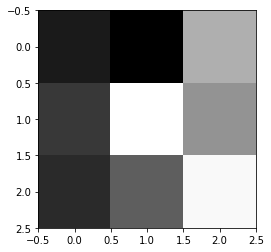

In [9]:
pyplot.imshow(data, cmap='gray'); #Procurar outras soluções

#Geração automatica das matrizes 'a' 

Raios bi nas seguintes direções:

n = tamanho da matriz (nXn)
Horizontal tem "n" raios e uma matriz a para cada raio naquela direção.
 - a = n

Vertical tem "n" raios e uma matriz a para cada raio naquela direção
 - a = n + n

Diagonal 1 tem "n" raios e uma matriz a para cada raio naquela direção
  - quantidade de diag = n*2 - 1
  - a = 2n + (2n - 1) 

 Diagonal 2  tem "n" raios e uma matriz a para cada raio naquela direção
 - a = 2n + 2(2n - 1) = 4n - 2 + 2n = 6n - 2


In [10]:
#Tamanho da imagem (nXn)
n = 3

#Matriz em branco nXn
mat = np.array([np.zeros(n)]*n)
mat

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [11]:
q_diag = n*2-1 #Quantidade de diagonais
t_matriz = n*n #quantidade de pixels da matriz

matrix = np.array([mat]*q_diag)#Cria uma matriz para cada diagonal (n*2)-1. Isso é a matriz "a" para cada diagonalde tamanho nXn
#faz o preenchimento das diagonais
for l in range(n):
  for i in range(n):
    for j in range(n):
      diagonal = []
      if i == j + l:
        matrix[l][i][j] = 1
      elif i == j - l:
        matrix[l + n-1][i][j] = 1

In [12]:
matrix

array([[[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]],

       [[0., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [1., 0., 0.]],

       [[0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 0.]],

       [[0., 0., 1.],
        [0., 0., 0.],
        [0., 0., 0.]]])

In [13]:
q_matriz_a = q_diag*2 + n*2 + 1 #quantidade de matrizes A total criadas, e quantidade de feixes b

mat_r = mat.reshape(t_matriz,1)#formato da matriz coluna

a = np.array([mat_r]*q_matriz_a)#Cria as matrizez final de "a" em branco

In [14]:
#preenche a matriz "a" com as matrizes diagonais achadas. Isso é um copia e cola na matriz nas posições
for i in range(q_diag):
 #print(i)
 a[i+1] = matrix[i].reshape(t_matriz,1)
 #print(i + q_diag + 1)
 a[i + q_diag + 1] = np.flipud(matrix[i]).reshape(t_matriz,1)

In [15]:
matrix2 = np.array([mat]*(n)) #cria uma matriz para raios horizontais
#preenche a matriz para linhas
for l in range(n):
  for i in range(n):
    for j in range(n):
      diagonal = []
      if i == l:
        matrix2[l][i][j] = 1

In [16]:
#Copia as matrizes horinzontais e verticais para o conjunto de matrizes no vetor "a" na devida posição
for i in range(n):
  #print( q_diag*2 + i + 1 ) #ultima posição preenchida pela diagonal + 1
  #print( q_diag*2 + i + n + 1)#ultima posição preenchida pela horizontal + 1
  a[q_diag*2 + i + 1] = matrix2[i].reshape(t_matriz,1) #coloca em formato de matriz coluna 
  a[q_diag*2 + i + n + 1] = np.rot90(matrix2[i]).reshape(t_matriz,1) #rotaciona para criar a a matriz horzontal

In [17]:
#Verifica o estado final da matriz "a". Só para vizualização, o formato de "a" esta correto (matriz coluna)
for i in range(q_matriz_a):
  print(a[i].reshape(3,3), "\n\n")

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]] 


[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]] 


[[0. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]] 


[[0. 0. 0.]
 [0. 0. 0.]
 [1. 0. 0.]] 


[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 0.]] 


[[0. 0. 1.]
 [0. 0. 0.]
 [0. 0. 0.]] 


[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]] 


[[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 0.]] 


[[1. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]] 


[[0. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]] 


[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 1.]] 


[[1. 1. 1.]
 [0. 0. 0.]
 [0. 0. 0.]] 


[[0. 0. 0.]
 [1. 1. 1.]
 [0. 0. 0.]] 


[[0. 0. 0.]
 [0. 0. 0.]
 [1. 1. 1.]] 


[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]] 


[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]] 


[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]] 




#Implementação da Modelagem para um caso "real"

In [18]:
'''
Função que lê um inteiro 'n' (tamanho da imagem quadrada) e lê uma matriz de pixels 'check'.
A partir do tamanho da imagem 'n' ele define o número de raios e o número de matrizes 'a' nescessárias para gerar a imagem.
A partir da imagem real de entrada, ele transforma a matriz de pixels nXn em uma matriz coluna (n*n)*1.
Com a matriz coluna, ele multiplica pela  matriz 'ai' e gera um valor escalar atribuido ao 'bi'.
Com todas as informações geradas ele passa para o algorítimo que melhor define os xi.
Atribui o resultado final a uma matriz nXn, que é sua resposta final
'''

def GeraImagem( n , check ):
  import numpy as np
  from PIL import Image
  from matplotlib import image
  from matplotlib import pyplot
  import matplotlib.pyplot as plt

  #Matriz em branco
  mat = np.array([np.zeros(n)]*n)
  q_diag = n*2-1 #Calculo da quantidade de diagonais
  t_matriz = n*n #quantidade de pixels da matriz
  q_matriz_a = q_diag*2 + n*2 + 1 #quantidade de matrizes A, e quantidade de feixes b
  mat_r = mat.reshape(t_matriz,1)#formato da matriz coluna
  matrix = np.array([mat]*q_diag)#Cria uma matriz para cada diagonal (n*2)-1 é a quantidade de diagonais da matriz nXn
  a = np.array([mat_r]*q_matriz_a)#Cria uma matriz para cada diagonal (n*2)-1 é a quantidade de diagonais da matriz nXn

  #Mepeia as diagonais a serem preenchidas nas matrizes 'a' diagonais
  for l in range(n):
    for i in range(n):
      for j in range(n):
        diagonal = []
        if i == j + l:
          matrix[l][i][j] = 1
        elif i == j - l:
          matrix[l + n-1][i][j] = 1
  #Atribui a matrizez 'a' as diagonais mapeadas
  for i in range(q_diag):
    #print(i)
    a[i+1] = matrix[i].reshape(t_matriz,1)
    #print(i + q_diag + 1)
    a[i + q_diag + 1] = np.flipud(matrix[i]).reshape(t_matriz,1)

  #Criação da matriz de raios horizontais
  matrix2 = np.array([mat]*(n)) #cria uma matriz para raios horizontais
  for l in range(n):
    for i in range(n):
      for j in range(n):
        diagonal = []
        if i == l:
          matrix2[l][i][j] = 1

  #Preenche as matrizes 'a' com os valores encontrados
  for i in range(n):
    #print( q_diag*2 + i + 1 ) #ultima posição preenchida pela diagonal + 1
    #print( q_diag*2 + i + n + 1)#ultima posição preenchida pela horizontal + 1
    a[q_diag*2 + i + 1] = matrix2[i].reshape(t_matriz,1)
    a[q_diag*2 + i + n + 1] = np.rot90(matrix2[i]).reshape(t_matriz,1)

  ##############################################################
  #Cria o vetor de raios b de acordo com a quantidade de matrizes a 
  b = np.array(np.arange(q_matriz_a))
  #FAZ a matriz de pixel X para ser iterada 
  x = np.array([mat_r]*q_matriz_a)

  #Determina os valores de bi a partir da imagem (caminho inverso)
  for i in range(1,q_matriz_a):
    b[i] = a[i].T.dot(check.reshape(n*n,1))

    #repetição de fora para os P
  for p in np.arange(1,50):
  #iteração interna para os X (x0, x1, x2,..., Xm)
    for k in np.arange(1,q_matriz_a):
      x[k] = x[k-1] + ( (b[k] - (a[k].T.dot(x[k-1]))) / a[k].T.dot(a[k]) )*(a[k])   
      #print("Valores : ", x[k], "\n\n")
    x[0] = x[k] #atribui o ultimo valor encontrado para a proxima iteração x0

   #Salva a "Imagem" em uma matrix (tamanho da imagem)
  data = x[-1].reshape((n,n))
  return data

In [19]:
'''
Função que lê um inteiro 'n' (tamanho da imagem quadrada) e lê uma matriz de pixels 'check'.
A partir do tamanho da imagem 'n' ele define o número de raios e o número de matrizes 'a' nescessárias para gerar a imagem.
A quantidade de Matrizes a é o número de incógnitas e o número de de bi.
A matriz 'a' foi gerada aleatóriamente, sem representação da realidade, apenas para condizer com o valor esperado de incógnitas do problema
A partir da imagem real de entrada, ele transforma a matriz de pixels nXn em uma matriz coluna (n*n)*1.
Com todas as informações geradas ele passa para o algorítimo que melhor define os xi.
Atribui o resultado final a uma matriz nXn, que é sua resposta final
'''

def GeraImagem2( n , check ):
  #Matriz em branco
  mat = np.array([np.zeros(n)]*n)
  t_matriz = n*n #quantidade de pixels da matriz
  q_matriz_a = t_matriz #quantidade de matrizes A, e quantidade de feixes b
  mat_r = mat.reshape(t_matriz,1)#formato da matriz coluna
  a = np.array([mat_r]*q_matriz_a)#Cria uma matriz para cada diagonal (n*2)-1 é a quantidade de diagonais da matriz nXn

    #Preenche as matrizes 'a' com os valores encontrados
  for i in range(q_matriz_a):
    #print( q_diag*2 + i + 1 ) #ultima posição preenchida pela diagonal + 1
    #print( q_diag*2 + i + n + 1)#ultima posição preenchida pela horizontal + 1
    a[i] = np.random.randint(0,2,((n*n),1))

  ##############################################################
  #Cria o vetor de raios b de acordo com a quantidade de matrizes a 
  b = np.array(np.arange(q_matriz_a))
  #FAZ a matriz de pixel X para ser iterada 
  x = np.array([mat_r]*q_matriz_a)

  #Determina os valores de bi a partir da imagem (caminho inverso)
  for i in range(1,q_matriz_a):
    b[i] = a[i].T.dot(check.reshape(n*n,1))

    #repetição de fora para os P
  for p in np.arange(1,50):
  #iteração interna para os X (x0, x1, x2,..., Xm)
    for k in np.arange(1,q_matriz_a):
      x[k] = x[k-1] + ( (b[k] - (a[k].T.dot(x[k-1]))) / a[k].T.dot(a[k]) )*(a[k])   
      #print("Valores : ", x[k], "\n\n")
    x[0] = x[k] #atribui o ultimo valor encontrado para a proxima iteração x0

  #Mostra o resultado depois de todas interações
  #x[-1].reshape((n,n))

  #Salva a "Imagem" em uma matrix (tamanho da imagem)
  data = x[-1].reshape((n,n))
  return data

#Implementando o Código com Tabuleiro de Xadrex

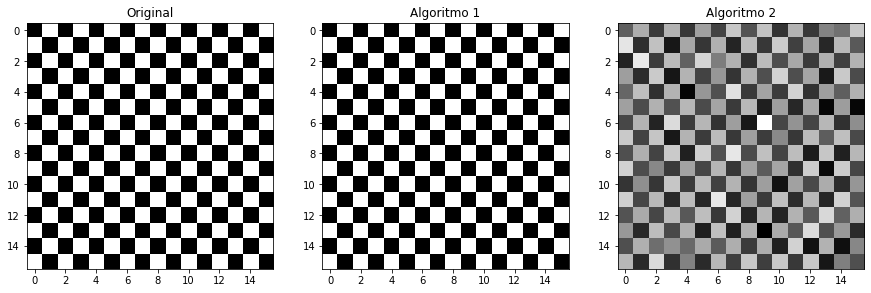

In [20]:
#Cria um tabuleiro de Xadrex
n = 16 #Tamanho da imagem
tabuleiro = np.zeros((n, n)) 
tabuleiro[::2, 1::2] = 1
tabuleiro[1::2, ::2] = 1

fig, axs = plt.subplots(ncols=3, sharex=True, figsize=(15, 15))
axs[0].set_title('Original')
axs[0].imshow(tabuleiro, cmap='gray', interpolation='nearest')

data = GeraImagem(n,tabuleiro) #chama a função passando a imagem que se quer determinar

axs[1].set_title('Algoritmo 1')
axs[1].imshow(data, cmap='gray', interpolation='nearest')

data2 = GeraImagem2(n,tabuleiro) #chama a função passando a imagem que se quer determinar

axs[2].set_title('Algoritmo 2')
axs[2].imshow(data2, cmap='gray', interpolation='nearest')
plt.show()

# Teste para números aleatórios

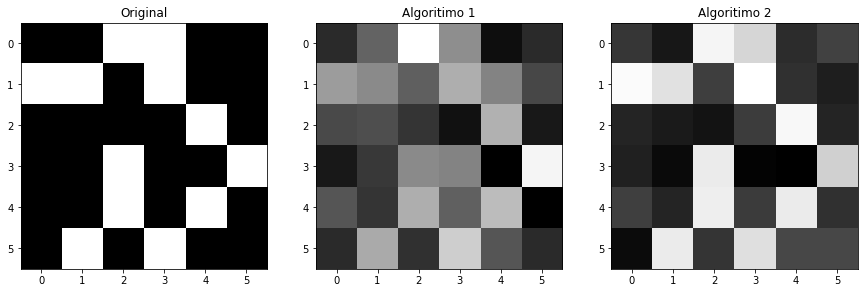

In [21]:
#Cria uma Imagem Aleatória
n = 6 #Tamanho da imagem
aleat = np.random.randint(2, size=(n,n))

fig, axs = plt.subplots(ncols=3, sharex=True, figsize=(15, 15))
axs[0].set_title('Original')
axs[0].imshow(aleat, cmap='gray', interpolation='nearest')

data = GeraImagem(n,aleat) #chama a função passando a imagem que se quer determinar
axs[1].set_title('Algoritimo 1')
axs[1].imshow(data, cmap='gray', interpolation='nearest')

data2 = GeraImagem2(n,aleat) #chama a função passando a imagem que se quer determinar
axs[2].set_title('Algoritimo 2')
axs[2].imshow(data2, cmap='gray', interpolation='nearest')
plt.show()

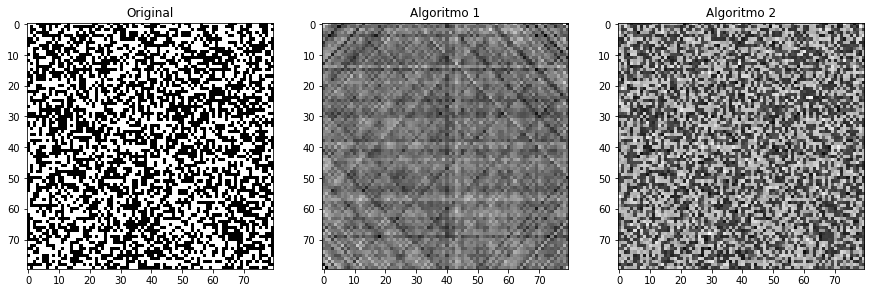

In [22]:
n = 80 #Tamanho da imagem
aleat = np.random.randint(2, size=(n,n))

fig, axs = plt.subplots(ncols=3, sharex=True, figsize=(15, 15))
axs[0].set_title('Original')
axs[0].imshow(aleat, cmap='gray', interpolation='nearest')

data = GeraImagem(n,aleat) #chama a função passando a imagem que se quer determinar

axs[1].set_title('Algoritmo 1')
axs[1].imshow(data, cmap='gray', interpolation='nearest')

data2 = GeraImagem2(n,aleat) #chama a função passando a imagem que se quer determinar

axs[2].set_title('Algoritmo 2')
axs[2].imshow(data2, cmap='gray', interpolation='nearest')
plt.show()

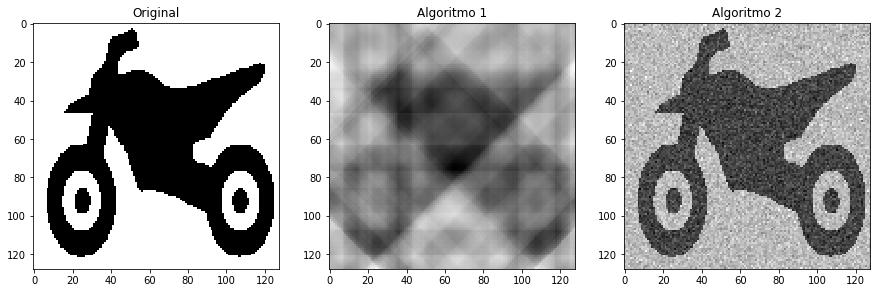

In [23]:
url = 'https://raw.githubusercontent.com/LeandroCoelhos/tomografia_computadorizada/main/moto128.bmp'
img = Image.open(requests.get(url, stream=True).raw)
img.load()
check = np.asarray( img, dtype="int32" )
n = len(check)

fig, axs = plt.subplots(ncols=3, sharex=True, figsize=(15, 15))
axs[0].set_title('Original')
axs[0].imshow(check, cmap='gray', interpolation='nearest')

data = GeraImagem(n, check) #chama a função passando a imagem que se quer determinar
data2 = GeraImagem2(n, check) #chama a função passando a imagem que se quer determinar

axs[1].set_title('Algoritmo 1')
axs[1].imshow(data, cmap='gray', interpolation='nearest')

axs[2].set_title('Algoritmo 2')
axs[2].imshow(data2, cmap='gray', interpolation='nearest')
plt.show()